In [1]:
import os
import matplotlib.pyplot as plt
import h5py
import numpy as np
import random

In [2]:
states_counties = [["Arizona", "Maricopa"],
                   ["California", "Alameda"],
                   ["California", "Contra Costa"],
                   ["California", "Los Angeles"],
                   ["California", "Orange"],
                   ["California", "Riverside"],
                   ["California", "Sacramento"],
                   ["California", "San Bernardino"],
                   ["California", "San Diego"],
                   ["California", "Santa Clara"],
                   ["Florida", "Broward"],
                   ["Florida", "Hillsborough"],
                   ["Florida", "Miami-Dade"],
                   ["Florida", "Orange"],
                   ["Florida", "Palm Beach"],
                   ["Illinois", "Cook"],
                   ["Massachusetts", "Middlesex"],
                   ["Michigan", "Oakland"],
                   ["Michigan", "Wayne"],
                   ["Minnesota", "Hennepin"],
                   ["Nevada", "Clark"],
                   ["New York", "Bronx"],
                   ["New York", "Kings"],
                   ["New York", "Nassau"],
                   ["New York", "New York"],
                   ["New York", "Queens"],
                   ["New York", "Suffolk"],
                   ["Ohio", "Cuyahoga"],
                   ["Ohio", "Franklin"],
                   ["Pennsylvania", "Allegheny"],
                   ["Pennsylvania", "Philadelphia"],
                   ["Texas", "Bexar"],
                   ["Texas", "Dallas"],
                   ["Texas", "Harris"],
                   ["Texas", "Tarrant"],
                   ["Utah", "Salt Lake"],
                   ["Virginia", "Fairfax"],
                   ["Washington", "King"]]

# Accessing and plotting yearly census data

This folder contains population data for non-Hispanic White, non-Hispanic Black, and Hispanic White populations for all US counties with $> 10^6$ total residents interpolated onto a regular square grid.

The data exists for every year between 2010-2021.

The data contains areas surrounding the county of interest (COI) to ensure data extends smoothly to the edges of COI.

Each county's data is contained in an HDF5 file under `processed/STATE_COUNTY.HDF5` The state and county combinations are given in the `states_counties` list above.

Each the HDF5 has 12 groups labeled by their year (written as a string, e.g. `"2015"`). Each group contains the same datasets:
- `x_grid`
    - 2D array of x-values of grid points
- `y_grid`
    - 2D array of y-values of grid points
- `mask`
    - 2D array with 1s inside and 0s outside of COI
- `w_grid`
    - 2D array of interpolated values of non-Hispanic White population
- `w_grid_masked`
    - same data as `w_grid`, but with `mask` applied. Values outside of `mask` are NaNs
- `b_grid`
    - 2D array of interpolated values of non-Hispanic Black population
- `b_grid_masked`
    - same data as `b_grid`, but with `mask` applied. Values outside of `mask` are NaNs
- `h_grid`
    - 2D array of interpolated values of Hispanic White population
- `h_grid_masked`
    - same data as `h_grid`, but with `mask` applied. Values outside of `mask` are NaNs

All grid points are spaced $0.5$ km apart in all counties.

Below we will select a random county and plot its populations over all 12 years

/project/vitelli/ml_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  del sys.path[0]
/project/vitelli/ml_venv/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/project/vitelli/ml_venv/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Eithe

Text(0.5, 0.98, 'California, San Bernardino County, Hispanic population')

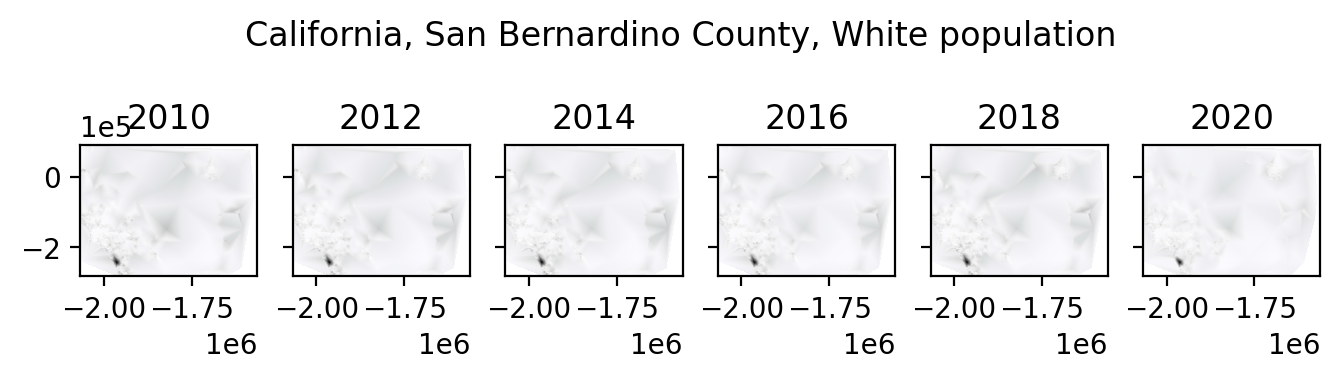

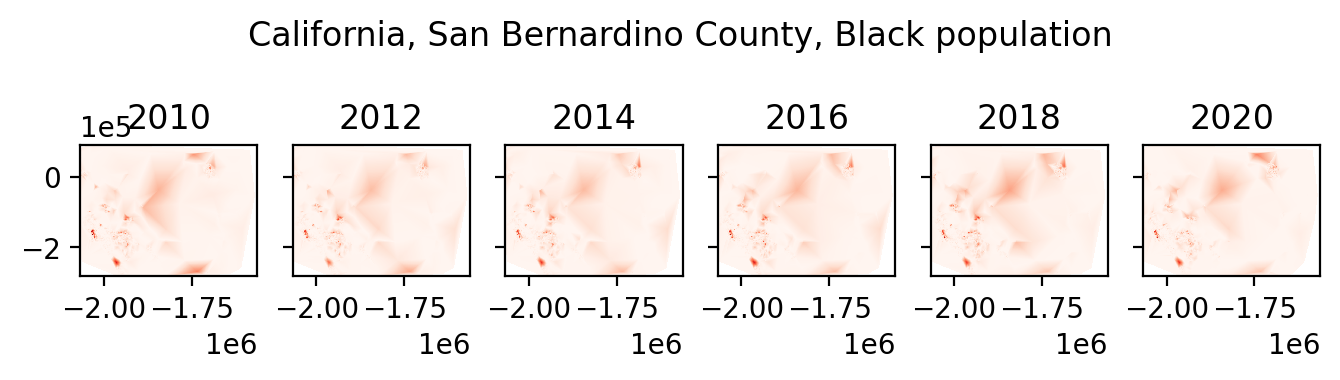

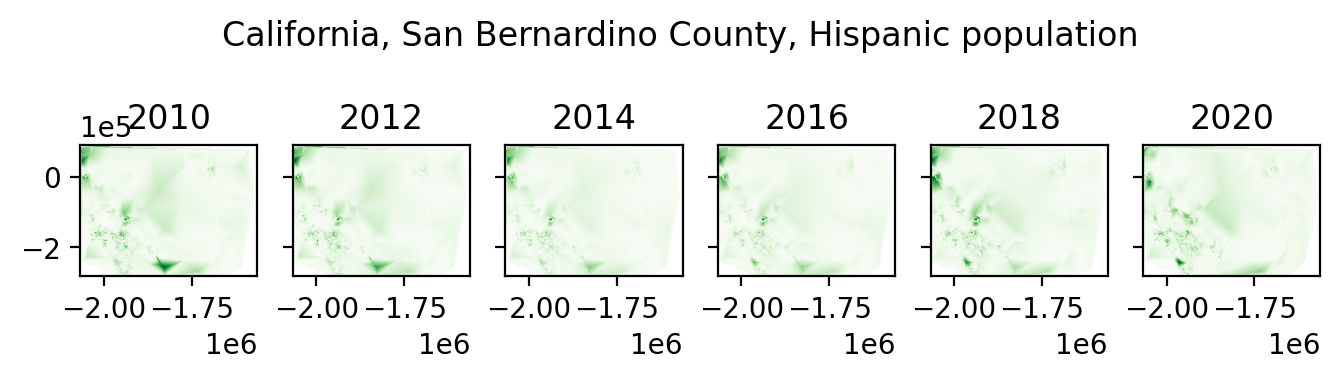

In [12]:
years = np.arange(2010, 2022)
state, county = random.choice(states_counties)

plt.rcParams['figure.dpi'] = 200
figw, axw = plt.subplots(1, 6, sharey=True, sharex=True, figsize=(8, 2))
figb, axb = plt.subplots(1, 6, sharey=True, sharex=True, figsize=(8, 2))
figh, axh = plt.subplots(1, 6, sharey=True, sharex=True, figsize=(8, 2))
for year, aw, ab, ah in zip(years[::2], axw.ravel(), axb.ravel(), axh.ravel()):
    with h5py.File(os.path.join("yearly/processed", f"{state}_{county}.hdf5"), "r") as d:
        aw.pcolormesh(d[str(year)]["x_grid"],
                      d[str(year)]["y_grid"],
                      d[str(year)]["w_grid"],
                      cmap="Blues")
        aw.set(title=year)
        aw.ticklabel_format(axis="both", style="sci", scilimits=(0,0))
        aw.set_aspect(1)
        
        ab.pcolormesh(d[str(year)]["x_grid"],
                      d[str(year)]["y_grid"],
                      d[str(year)]["b_grid"],
                      cmap="Reds")
        ab.set(title=year)
        ab.ticklabel_format(axis="both", style="sci", scilimits=(0,0))
        ab.set_aspect(1)
        
        ah.pcolormesh(d[str(year)]["x_grid"],
                      d[str(year)]["y_grid"],
                      d[str(year)]["h_grid"],
                      cmap="Greens")
        ah.set(title=year)
        ah.ticklabel_format(axis="both", style="sci", scilimits=(0,0))
        ah.set_aspect(1)

figw.suptitle(f"{state}, {county} County, White population")
figb.suptitle(f"{state}, {county} County, Black population")
figh.suptitle(f"{state}, {county} County, Hispanic population")